In [57]:
import os
import pandas as pd
import numpy as np
import plotnine as p9

In [58]:
# list output files
file_paths = os.listdir(os.path.join('data', 'results'))
# keep only .csv files
results = [pd.read_csv(os.path.join('data', 'results', p)) for p in file_paths if p.endswith('.csv')]

In [59]:
results = pd.concat(results)

In [60]:
results['mean_auc'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['auroc'].transform('mean')
results['mean_f1'] = results.groupby(['reduction_name', 'dataset', 'score_key'])['f1_score'].transform('mean')

In [68]:
results.sort_values(['reduction_name', 'dataset', 'score_key'])

,reduction_name,score_key,state,fold,auroc,tpr,fpr,f1_score,oob_score,train_split,test_split,test_classes,dataset,mean_auc,mean_f1
2,mofa,expr_prod,0,0,0.888889,[0. 0.66666667 0.66666667 1. 1...,[0. 0. 0.33333333 0.33333333 1...,0.828571,0.400000,[ 1 2 3 4 7 8 9 10 11 15],[ 0 5 6 12 13 14],[0 0 0 1 1 1],carraro,0.703426,0.596984
14,mofa,expr_prod,0,1,0.666667,[0. 0.33333333 0.66666667 0.66666667 1...,[0. 0. 0. 1. 1.],0.566667,0.727273,[ 0 4 5 6 7 10 11 12 13 14 15],[1 2 3 8 9],[0 0 1 1 1],carraro,0.703426,0.596984
26,mofa,expr_prod,0,2,1.000000,[0. 0.5 1. 1. ],[0. 0. 0. 1.],0.800000,0.454545,[ 0 1 2 3 5 6 8 9 12 13 14],[ 4 7 10 11 15],[0 1 0 1 0],carraro,0.703426,0.596984
38,mofa,expr_prod,1,0,0.666667,[0. 0.33333333 0.33333333 0.66666667 1...,[0. 0. 0.33333333 0.33333333 1...,0.485714,0.500000,[ 1 2 4 5 8 10 11 12 13 14],[ 0 3 6 7 9 15],[0 1 0 1 1 0],carraro,0.703426,0.596984
50,mofa,expr_prod,1,1,0.333333,[0. 0. 0.5 0.5 1. ],[0. 0.33333333 0.33333333 1. 1...,0.342857,0.636364,[ 0 1 3 6 7 8 9 10 13 14 15],[ 2 4 5 11 12],[0 0 0 1 1],carraro,0.703426,0.596984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,tensor,magnitude_rank,3,1,0.612500,[0. 0. 0.4 0.4 0.6 0.6 0.8 0.8 1. 1. ],[0. 0.125 0.125 0.25 0.25 0.5 0.625 0.8...,0.620047,0.560000,[ 0 1 3 4 5 7 9 10 11 12 13 14 17 20 21 ...,[ 2 6 8 15 16 18 19 22 25 29 32 33 37],[0 1 0 0 0 1 0 0 1 0 1 1 0],velmeshev,0.616601,0.545720
143,tensor,magnitude_rank,3,2,0.485714,[0. 0. 0. 0.4 0.4 1. 1. 1. ],[0. 0.14285714 0.42857143 0.42857143 0...,0.388889,0.615385,[ 0 2 6 8 10 13 15 16 17 18 19 20 21 22 24 ...,[ 1 3 4 5 7 9 11 12 14 23 26 27],[1 0 0 1 0 0 1 0 0 0 1 1],velmeshev,0.616601,0.545720
155,tensor,magnitude_rank,4,0,0.607143,[0. 0.16666667 0.16666667 0.33333333 0...,[0. 0. 0.14285714 0.14285714 0...,0.474359,0.560000,[ 0 1 2 3 4 6 7 8 10 11 12 13 14 15 17 ...,[ 5 9 16 20 21 23 24 25 27 33 34 36 37],[1 0 0 0 1 0 1 1 1 1 0 0 0],velmeshev,0.616601,0.545720
167,tensor,magnitude_rank,4,1,0.547619,[0. 0.16666667 0.33333333 0.33333333 0...,[0. 0.14285714 0.14285714 0.28571429 0...,0.532967,0.600000,[ 1 4 5 9 10 12 13 14 16 17 19 20 21 23 24 ...,[ 0 2 3 6 7 8 11 15 18 22 26 29 35],[1 0 0 1 0 0 1 0 1 0 1 0 1],velmeshev,0.616601,0.545720


In [28]:
results['score_key'].unique()

remap_dict = {'lr_means':'CellPhoneDB',
              'expr_prod':'Product',
              'lr_logfc': 'logFC',
              'lrscore': 'SingleCellSignalR',
              'lr_probs': 'CellChat',
              'magnitude_rank':'Consensus'}
results['score_key'] = results['score_key'].map(remap_dict)

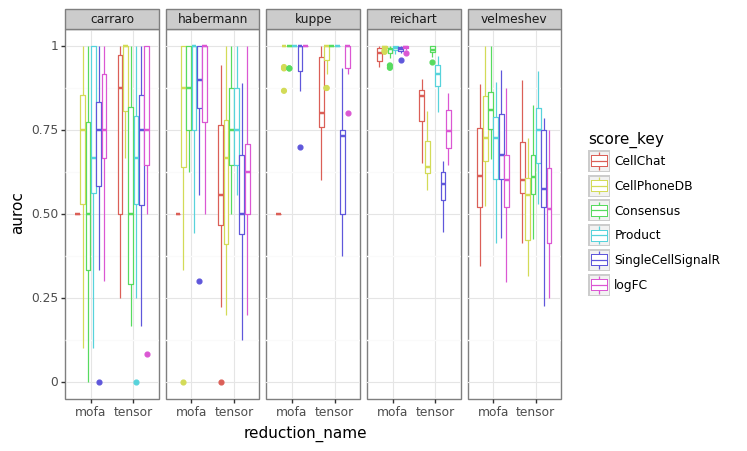

<ggplot: (8764228688990)>

In [29]:
## plot results as boxplots by reduction_name & score_key
p9.ggplot(results, p9.aes(x='reduction_name', y='auroc', color='score_key')) + \
    p9.geom_boxplot() + \
    p9.theme_bw() + p9.facet_grid(' ~ dataset')

In [30]:
metric = 'mean_auc'

In [31]:
results = results[['reduction_name', 'score_key', 'mean_auc', 'mean_f1', 'dataset']].drop_duplicates()

In [32]:
results['rank'] = results.groupby(['dataset', 'reduction_name'])[metric].rank(ascending=False, method='average').astype('int')

In [33]:
results.head()

,reduction_name,score_key,mean_auc,mean_f1,dataset,rank
0,mofa,CellPhoneDB,0.672870,0.620291,carraro,4
1,tensor,CellPhoneDB,0.904630,0.642540,carraro,1
2,mofa,Product,0.703426,0.596984,carraro,2
3,tensor,Product,0.629167,0.550265,carraro,5
4,mofa,logFC,0.752407,0.543492,carraro,1


In [34]:
# mean rank per score
score_avg = results.groupby(['score_key', 'reduction_name'])[['rank', 'mean_auc', 'mean_f1']].mean()

In [35]:
score_avg

rank  mean_auc   mean_f1
score_key         reduction_name                          
CellChat          mofa             5.8  0.620945  0.443462
                  tensor           3.6  0.720448  0.653086
CellPhoneDB       mofa             3.2  0.833350  0.778263
                  tensor           3.6  0.735326  0.614909
Consensus         mofa             3.6  0.837470  0.712348
                  tensor           2.6  0.783739  0.734833
Product           mofa             2.2  0.850617  0.748368
                  tensor           2.0  0.807544  0.706877
SingleCellSignalR mofa             3.8  0.833188  0.738190
                  tensor           5.2  0.611810  0.562380
logFC             mofa             2.2  0.846573  0.768447
                  tensor           3.8  0.716946  0.617341

In [36]:
score_avg['dataset'] = "Score Average"

In [37]:
## bind to results
results = pd.concat([results, score_avg.reset_index()])

In [38]:
# if dataset != 'Score Average', then None
results['rank'] = results['rank'].where(results['dataset'] == 'Score Average', None)

In [39]:
results['mean_auc'] = results['mean_auc'].round(2)

In [40]:
# to title

results['dataset'] = results['dataset'].replace({'Score Average': 'Average'})
results['dataset'] = pd.Categorical(results['dataset'], categories=['carraro', 'habermann', 'kuppe', 'velmeshev', 'reichart', 'Average'])
results['dataset'] = results['dataset'].str.title()

In [48]:
results['reduction_name'] = results['reduction_name'].replace({"mofa":"MOFA+", 'tensor':"Tensor-cell2cell"})

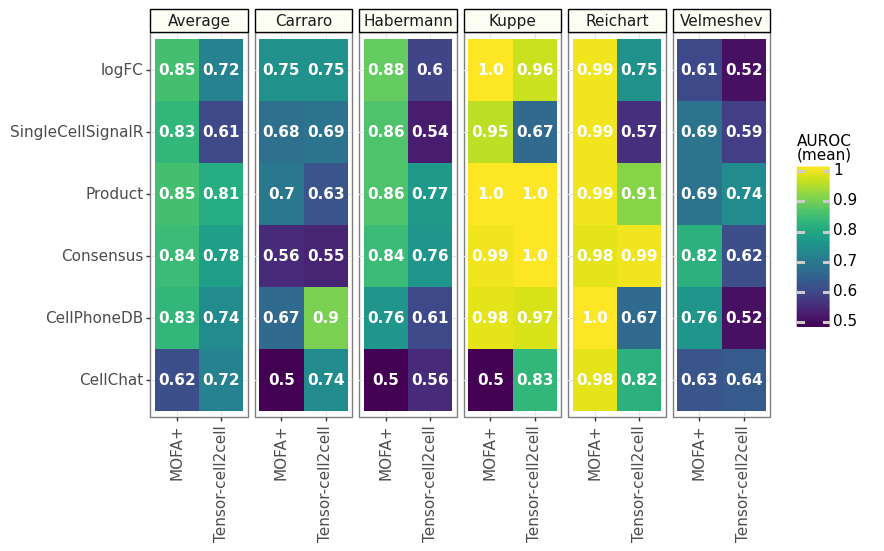

<ggplot: (8764225741692)>

In [55]:
## mosaic plot
# order alphabetically
p9.ggplot(results, p9.aes(x='reduction_name', y='score_key', fill='mean_auc')) + \
    p9.geom_tile() + \
    p9.theme_bw(base_size=11) + \
    p9.facet_grid(' ~ dataset') + \
    p9.scale_fill_cmap(limits=(0.5, 1), cmap_name='viridis') + \
    p9.geom_text(p9.aes(label='mean_auc'), size=11, color='white', fontweight='bold') + \
    p9.theme(figure_size=(8, 5), axis_text_x=p9.element_text(angle=90, size=11),
             strip_text_x=p9.element_text(size=11),
            strip_background=p9.element_rect(colour="black", fill="#fdfff4"),
            legend_text=p9.element_text(size=11),
            axis_text_y=p9.element_text(size=11),
             ) + \
    p9.labs(x='', y='', fill='AUROC\n(mean)\n')

In [20]:
dimred_results = results.groupby(['reduction_name', 'score_key']).mean().reset_index()

/tmp/ipykernel_601042/2054308315.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


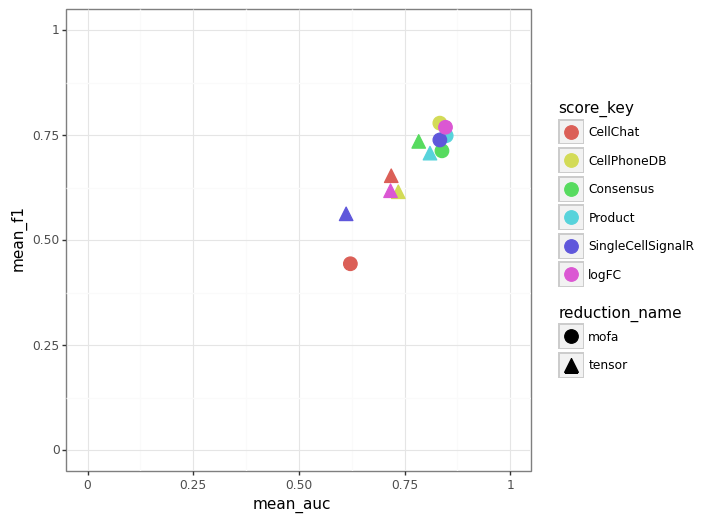

<ggplot: (8764228386429)>

In [21]:
## scatter plot by reduction_name
p9.ggplot(dimred_results, p9.aes(x='mean_auc', y='mean_f1', color='score_key', shape='reduction_name')) + \
    p9.geom_point(size=5) + \
        p9.theme_bw() + \
        p9.scale_x_continuous(limits=(0, 1)) + \
        p9.scale_y_continuous(limits=(0, 1)) + \
        p9.theme(figure_size=(6, 6))

Reichart Model - Does not look like something I want to include

In [ ]:
import numpy as np
import pandas as pd

import scanpy as sc

import plotnine as p9

import liana as li

# load muon and mofax
import muon as mu
import mofax as mofa

import decoupler as dc

In [ ]:
adata = sc.read_h5ad(os.path.join('data', 'results', 'reichart_dimred.h5ad'), backed='r')

In [ ]:
meta_features = ['Sample','Region_x', 'Primary.Genetic.Diagnosis', 'tissue', 'sex', 'assay', 'development_stage', 'disease']

In [ ]:
model = mofa.mofa_model(os.path.join("data", "results", "models", "reichart", "expr_prod.hdf5"))
metadata = adata.obs[meta_features].drop_duplicates().rename(columns={'Sample':'sample', 'disease':'condition'})
model.metadata = model.metadata.merge(metadata, on='sample')

In [ ]:
metadata.groupby(["condition",'Primary.Genetic.Diagnosis']).count()

In [ ]:
model.get_weights().shape

TODO save mdata

In [ ]:
mdata = li.multi.lrs_to_views(adata,
                              sample_key="Sample",
                              score_key="expr_prod",
                              inverse_fun=lambda x: -np.log2(x),
                              lr_prop = 0.33, # minimum required proportion of samples to keep an LR
                              lrs_per_sample = 5, # minimum number of interactions to keep a sample in a specific view
                              lrs_per_view = 15, # minimum number of interactions to keep a view
                              samples_per_view = 5, # minimum number of samples to keep a view
                              min_variance = 0, # minimum variance to keep an interaction
                              lr_fill = 0, # fill missing LR values across samples with this
                              verbose=True
                              )


In [ ]:
mdata.varm["LFs"] = model.get_weights()
mdata.obsm["X_mofa"] = model.get_factors()

In [ ]:
mdata.obs = model.metadata.set_index('sample')

Check Factors

In [ ]:
factor_scores = li.multi.get_factor_scores(mdata, obsm_key='X_mofa')
factor_scores.head()

In [ ]:
factor_scores

In [ ]:
# scatterplot
(p9.ggplot(factor_scores) +
 p9.aes(x='condition', colour='condition', y='Factor1') +
 p9.geom_violin() +
 p9.geom_jitter(size=4, width=0.2) +
 p9.theme_bw() +
 p9.scale_colour_manual(values=['#1f77b4', '#c20019'])
 )



UMAP

In [ ]:
sc.pp.neighbors(mdata, use_rep="X_mofa")
sc.tl.umap(mdata)

In [ ]:
sc.tl.umap(mdata, min_dist=.2, spread=1., random_state=10)

In [ ]:
# scatter plot between Factor 1 and Factor 2
(p9.ggplot(factor_scores) +
 p9.aes(x='Factor1', y='Factor2', colour='condition', shape='tissue') +
 p9.geom_point(size=4) +
 p9.theme_bw()
 )

In [ ]:
mofa.plot_weights_correlation(model)

In [ ]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['sex']), pvalues=True)

In [ ]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['development_stage']), pvalues=True)

In [ ]:
mofa.plot_factors_covariates_correlation(model, covariates=pd.get_dummies(model.metadata['Primary.Genetic.Diagnosis']), pvalues=True)

In [ ]:
# get variance explained by view and factor
rsq = model.get_r2()
rsq["R2"] = rsq["R2"] / 100

In [ ]:
## tile plot
(p9.ggplot(rsq, p9.aes(x='Factor', y='View', fill='R2')) + 
    p9.geom_tile() + 
    p9.theme_bw() + 
    p9.theme(figure_size=(10, 10)) +
    p9.labs(x='Factor', y='View', fill='R2') +
    p9.theme(axis_text_x=p9.element_text(angle=90, hjust=1)) + 
    # change colour
    p9.scale_fill_cmap(limits=(0, 1), cmap_name='magma')
    
)

In [ ]:
# Factor 1
factor1_rsq = rsq[rsq['Factor']=='Factor1']
# separate view column
factor1_rsq[['source', 'target']] = factor1_rsq['View'].str.split('&', 1, expand=True)

In [ ]:
(p9.ggplot(factor1_rsq.reset_index()) +
 p9.aes(x='target', y='source') +
 p9.geom_tile(p9.aes(fill='R2')) +
 p9.scale_fill_cmap(limits=(0, 0.5), cmap_name='magma') +
 p9.theme_bw() +
    p9.theme(figure_size=(5, 5)) +
    p9.labs(x='Target groups', y='Source groups', fill='R2') +
    p9.theme(axis_text_x=p9.element_text(rotation=90, hjust=0.5))
 )



In [ ]:
variable_loadings =  li.multi.get_variable_loadings(mdata,
                                                    view_separator=':',
                                                    pair_separator="&",
                                                    variable_separator="^") # get loadings for factor 1
variable_loadings.head()



In [ ]:
variable_loadings['size'] = 4.5

my_plot = li.pl.dotplot(liana_res = variable_loadings,
                        size='Factor2',
                        colour='Factor1',
                        orderby='Factor1',
                        top_n=20,
                        source_labels=['myeloid cell', 'fibroblast of cardiac tissue', 'endothelial cell'],
                        orderby_ascending=False,
                        size_range=(0.1, 8),
                        figure_size=(14, 10)
                        )
# change colour, with mid as white
my_plot + p9.scale_color_gradient2(low='#1f77b4', mid='lightgray', high='#c20019')

